# Лабораторна робота №4 з Випадкових Процесів
                Виконала Неділько Дарина КМ-91

## Моделювання ланцюгів Маркова та розрахунок їх характеристик.
Змоделювати ланцюг Маркова з поглинанням для заданих перехідних і 
початкових ймовірностей (довжина реалізації – до поглинання). Кількість 
реалізацій – більше 100.
За отриманими реалізаціями знайти оцінки матриці переходів. 
За отриманою матрицею переходів знайти:
- фундаментальну матрицю; 
- середню кількість кроків, яку ланцюг знаходиться в стані коли процес почався зі стану n ;
- середній час поглинання;
- ймовірності поглинання;

Порівняти отримані результати з результатами лабораторної роботи 3.

Для початку імпортуємо необхідні бібліотеки

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Матриця перехідних та вектор початкових ймовірностей для цього завдання(беремо з лабораторної 3)

In [15]:
P =  np.array([[1, 0, 0, 0],[0.24, 0.25, 0.42, 0.09],[0.24, 0.05, 0.24, 0.47],[0.13, 0.65, 0.21, 0.01]])
p0 = np.array([0.2,0.1,0.2,0.5])
print("Матриця переходів")
print(P)
print("Початкові ймовірності")
print(p0)

Матриця переходів
[[1.   0.   0.   0.  ]
 [0.24 0.25 0.42 0.09]
 [0.24 0.05 0.24 0.47]
 [0.13 0.65 0.21 0.01]]
Початкові ймовірності
[0.2 0.1 0.2 0.5]


Задаємо кількість реалізацій

In [17]:
M = int(input("Введіть кількість реалізацій "))

Допоміжні функції для генерування випадкового числа та матриці станів

In [18]:
def k_generator(p): 
    r = np.random.uniform(0, 1) 
    curr = 0 
    for i, pe in enumerate(p): 
        curr += pe 
        if curr>=r: 
            return i+1
        
def find_ind(matrix):
    for idx, row in enumerate(matrix):
        if 1 in row:
            return idx + 1

Почнімо моделювати ланцюг Маркова 
Спочатку беремо початковий стан р0 та генеруємо деяке число r. Визначаємо якому стану воно належить та переходимо у нього. Потім "витягаємо" цей стан з нашої матриці ймовірностей та так само генеруємо випадкове число, визначаємо стан та переходимо до нього, допоки не отримаємо одиницю. Повторюємо те саме М-1 разів


In [19]:

stop = 1 
lens = [] 
for m in range(M): 
    idx = find_ind(P)
    k = k_generator(p0) 
    ktemp = [k]
    while k!= stop: 
        t = P[k-1] 
        k = k_generator(t) 
        ktemp.append(k) 
    lens.append(ktemp) 

Будуємо графіки

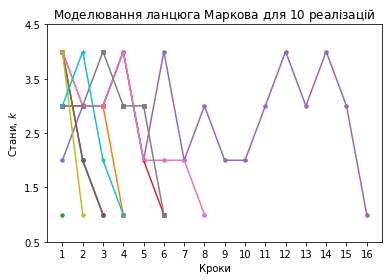

In [20]:
def markers_list_return(num):
    markers_list_start = list(Line2D.markers.keys())[11:17]
    markers_list = markers_list_start.copy()
    while len(markers_list) < num:
        markers_list += markers_list_start
    return markers_list


def plot_chain_states(markov_states_data, num=10, n=4):
    fig, ax = plt.subplots()
    markers_list = markers_list_return(num)
    max_x_data_len = 0
    plt.title(r"Моделювання ланцюга Маркова для ${}$ реалізацій".format(num))
    for idx in range(num):
        y_data = markov_states_data[idx]
        x_data = range(1, len(y_data) + 1)
        max_x_data_len = len(y_data) if len(y_data) > max_x_data_len else max_x_data_len
        plt.plot(x_data, y_data, label=r"Реалізація - {}".format(idx + 1))
        plt.scatter(x_data, y_data, s=15, marker=markers_list[idx])
    plt.yticks(np.arange(0.5, n + 1.5))
    plt.xticks(np.arange(1, max_x_data_len + 1))
    ax.set(xlabel="Кроки", ylabel=r"Стани, $k$")
    plt.show()

plot_chain_states(lens)

Будуємо експериментальну матрицю для M переходів

In [21]:
def chain_probs(states):
    dict_reals = {}
    for r in states:
        for i in range(len(r) - 1):
            str_r = f"{r[i]}->{r[i+1]}"
            if str_r in dict_reals.keys():
                dict_reals[str_r] += 1
            else:
                dict_reals[str_r] = 1
    dict_all_len = {}
    for i in range(len(p0)):
        for k, v in dict_reals.items():
            if k[0] == str(i + 1) and k[0] in dict_all_len.keys():
                dict_all_len[k[0]] += v
            elif k[0] == str(i + 1) and k[0] not in dict_all_len.keys():
                dict_all_len[k[0]] = v
    dict_probs = {k: round(v / dict_all_len[k[0]], 2) for k, v in dict_reals.items()}
    return dict_probs

def constr(dict_probs):
    n = 4
    matrix = [[1 if i == 0 else 0 for i in range(n)]] + [[0] * n for i in range(n - 1)]
    for k, v in dict_probs.items():
        k_m = [int(elem) - 1 for elem in k.split("->")]
        matrix[k_m[0]][k_m[1]] = v
    return np.array(matrix)
                
              
probs = chain_probs(lens)
cmx = constr(probs)

print(f"\nЕксперементальна матриця переходів для М= {M}:")
print(cmx)


Експерементальна матриця переходів для М= 10000:
[[1.   0.   0.   0.  ]
 [0.24 0.25 0.42 0.09]
 [0.24 0.05 0.24 0.47]
 [0.13 0.66 0.2  0.01]]


Тепер розрахуємо середній експериментальний час перебування у стані

Теоретичні значення були 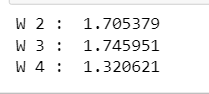

In [22]:
def avgt_1(states, m):
    avgt = {}
    for r in states:
        for elem in r:
            if elem == 1:
                break
            if str(elem) in avgt.keys():
                avgt[str(elem)] += 1 / m
            else:
                avgt[str(elem)] = 1 / m

    return avgt

def printSKD(data):
    for k in sorted(data):
        print("{:<3}: {}".format(k, data[k]))


avgt = avgt_1(lens, M)
printSKD(avgt)

2  : 1.2988999999998734
3  : 1.3101999999998721
4  : 1.2426999999998796


Вирахуємо середній експериментальний час поглинання зі стану
Теоретичний був 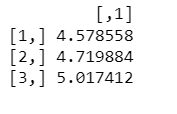


In [23]:
def avgAbsT(states):
    abstime = {}
    numtime = {}
    for r in states:
        if r[0] == 1:
            continue
        if str(r[0]) in abstime.keys():
            abstime[str(r[0])] += len(r) - 1
            numtime[str(r[0])] += 1
        else:
            abstime[str(r[0])] = len(r) - 1
            numtime[str(r[0])] = 1
    abstime = {k: v / numtime[k] for k, v in abstime.items()}
    return abstime



avgabst = avgAbsT(lens)
printSKD(avgabst)

2  : 4.623115577889447
3  : 4.745258841619682
4  : 4.909416683257017


Розраховуємо ексспериментальну ймовірність поглинання
теоретично було
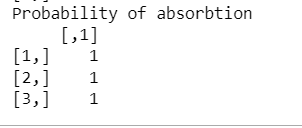

In [24]:
def absorb_prob(states):
    abs_m = {}
    abs_n = {}
    for r in states:
        if r[0] == 1:
            continue
        if r[-1] == 1:
            if str(r[0]) in abs_m.keys():
                abs_m[str(r[0])] += 1
            else:
                abs_m[str(r[0])] = 1
        if str(r[0]) in abs_n.keys():
            abs_n[str(r[0])] += 1
        else:
            abs_n[str(r[0])] = 1
        abs_prob = {k: v / abs_n[k] for k, v in abs_m.items()}
    return abs_prob



probab = absorb_prob(lens)
printSKD(probab)

2  : 1.0
3  : 1.0
4  : 1.0


Теоретичні та експериментальні дані не точно співпадають через похибку округлення при обрахунках у третій лабораторній роботі.

## Змоделювати регулярний ланцюг Маркова для заданих перехідних і початкових ймовірностей (довжина реалізації – не менше 10). Кількість реалізацій – більше 100.
За отриманими реалізаціями знайти оцінки матриці переходів.
За знайденою матрицею переходів знайти:
- фінальні ймовірності;
- фундаментальну матрицю;
- середній час перебування в заданому стані за 4кроків;
- середній час виходу ланцюга в заданий стан (в стан j, коли процес почався зі стану n);
- середній час виходу ланцюга в заданий стан в стаціонарному режимі (коли початковий стан не заданий).

Порівняти отримані результати з результатами лабораторної роботи 3.

In [25]:
P2 = np.array([[0.28, 0.41, 0.31],[0.29, 0.23, 0.48],[0.24, 0.41, 0.35]]) 
p02 = np.array([0.42, 0.14, 0.44])
print("Матриця переходів")
print(P2)
print("Початкові ймовірності")
print(p02)

Матриця переходів
[[0.28 0.41 0.31]
 [0.29 0.23 0.48]
 [0.24 0.41 0.35]]
Початкові ймовірності
[0.42 0.14 0.44]


Так само генеруємо ланцюг маркова та будуємо графік

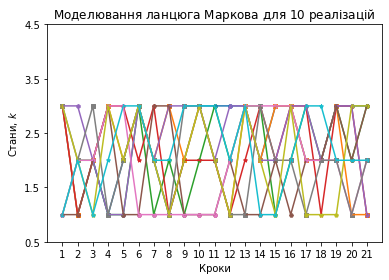

In [26]:
lens = [] 
for m in range(M): 
    idx = find_ind(P2)
    k = k_generator(p02) 
    ktemp = [k]
    for i in range(20): 
        t = P2[k-1] 
        k = k_generator(t) 
        ktemp.append(k) 
    lens.append(ktemp) 
    
plot_chain_states(lens)

Тепер будуємо експериментальну матрицю для М переходів

In [27]:
def regular_mx(probs):
    n = 3
    matrix = [[0] * n for i in range(n)]
    for k, v in dict_probs.items():
        k_m = [int(elem) - 1 for elem in k.split("->")]
        matrix[k_m[0]][k_m[1]] = v
    return np.array(matrix)


probs = chain_probs(lens)
rmx = construct_matrix_reg(probs)
print(rmx)

NameError: name 'construct_matrix_reg' is not defined

Матриці збігаються!

Тепер будемо шукати експериментальний середній час перебування у певному стані. Теоретичні значення: 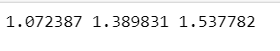

In [ ]:
def avgTreg(states, m):
    dict_avg_time = {}
    for r in states:
        for elem in r:
            if str(elem) in dict_avg_time.keys():
                dict_avg_time[str(elem)] += 1 / m
            else:
                dict_avg_time[str(elem)] = 1 / m
    return dict_avg_time


avgt_reg = avgTreg(lens, M)
printSKD(avgt_reg)

При обчисленні теоретичних значень було допущено помилку. Велика ймовірністть, що було попущено помилку при написанні формул для обчислення 


Знадемо тепер середній час виходу у стаціонарний режим Теоретичні значення: 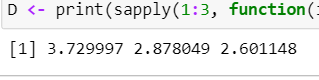

In [ ]:

def stationar(states):
    last_time = {}
    for r in states:
        elem = r[-1]
        if str(elem) in last_time.keys():
            last_time[str(elem)] += 1
        else:
            last_time[str(elem)] = 1
    last_time = {k: round(v / m, 4) for k, v in last_time.items()}
    return last_time



stationar = stationar(lens)

stationar_time = {k: round(1 / v, 4) for k, v in stationar.items()}
printSKD(stationar_time)

Ці дані збігаються! Майже усі теоретичні дані збігаються з практичними, що були вирахувані у 3 лабораторній!